# Практическая работа 4

## Задание №1

In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import skew,kurtosis
import pandas as pd
from matplotlib import pyplot as plt
sns.set()

# Graphics in SVG format are more sharp and legible
#%config InlineBackend.figure_format = 'svg'

In [2]:
norm_data=np.random.normal(size=1000)
exp_data=np.random.exponential(size=1000)
un_data=np.random.uniform(size=1000)
geom_data=np.random.geometric(0.5,size=1000)

In [3]:
def get_stats(data: np.ndarray):
    data_min=data.min()
    data_max=data.max()
    data_mean=data.mean()
    data_var=data.var()
    data_std=data.std()
    data_quart=np.percentile(data,25)
    data_sevfiv=np.percentile(data,75)
    data_step=data_max-data_min
    data_median=np.median(data)
    data_skew=skew(data)
    data_kurtosis=kurtosis(data)
    return [data_min,data_max,data_mean,data_var,data_std,data_quart,data_sevfiv,data_step,data_median,data_skew,data_kurtosis]
    
    
numpy_df=[get_stats(norm_data),get_stats(exp_data),get_stats(un_data),get_stats(geom_data)]
#print(numpy_df)
numpy_df=np.concatenate(numpy_df).reshape(4,11)

In [4]:
numpy_df

array([[-3.00649280e+00,  3.44843942e+00,  3.96268377e-03,
         9.40133198e-01,  9.69604661e-01, -6.42631190e-01,
         6.54881851e-01,  6.45493222e+00, -1.13110948e-02,
        -4.60737973e-02, -9.22860392e-03],
       [ 3.26807167e-05,  9.98074896e+00,  1.02434521e+00,
         1.19365209e+00,  1.09254386e+00,  3.01070268e-01,
         1.37008683e+00,  9.98071628e+00,  6.87225586e-01,
         2.55807949e+00,  1.00612687e+01],
       [ 1.67647041e-03,  9.99355580e-01,  4.87352133e-01,
         8.56028372e-02,  2.92579625e-01,  2.30440137e-01,
         7.39759888e-01,  9.97679110e-01,  4.79416053e-01,
         4.85455760e-02, -1.21674005e+00],
       [ 1.00000000e+00,  9.00000000e+00,  2.03900000e+00,
         1.94547900e+00,  1.39480429e+00,  1.00000000e+00,
         3.00000000e+00,  8.00000000e+00,  2.00000000e+00,
         1.83202699e+00,  3.82337594e+00]])

In [5]:
df=pd.DataFrame(numpy_df)
df=df.rename(columns={
    0:'Минимум',1:'Максимум',2:'Среднее',3:'Дисперсия',4:"СКО",5:'25% перцентиль',6:'75% перцентиль',
    7:"Размах",8:"Медиана",9:"Коеф. асимметрии",10:'Коеф. экцесса'
                     },index={0:'Нормальное',1:'Экспонинциальное',2:'Равномерное',3:'Геометрическое'})
df

,Минимум,Максимум,Среднее,Дисперсия,СКО,25% перцентиль,75% перцентиль,Размах,Медиана,Коеф. асимметрии,Коеф. экцесса
Нормальное,-3.006493,3.448439,0.003963,0.940133,0.969605,-0.642631,0.654882,6.454932,-0.011311,-0.046074,-0.009229
Экспонинциальное,0.000033,9.980749,1.024345,1.193652,1.092544,0.301070,1.370087,9.980716,0.687226,2.558079,10.061269
Равномерное,0.001676,0.999356,0.487352,0.085603,0.292580,0.230440,0.739760,0.997679,0.479416,0.048546,-1.216740
Геометрическое,1.000000,9.000000,2.039000,1.945479,1.394804,1.000000,3.000000,8.000000,2.000000,1.832027,3.823376


In [6]:
df.to_csv('task_1.csv',index=True)

## Задание №2

In [7]:
data=pd.read_csv(r'titanic.csv')

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data=data.set_index('PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
data.Sex=data.Sex.replace({'male':'0','female':'1'})
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [12]:
data=data.sort_values(by=['Sex','Age'],ascending=[True,False])
pd.concat([data.head(10),data.tail(10)])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,NaN,S
97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
494,0,1,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,NaN,C
117,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.7500,NaN,Q
673,0,2,"Mitchell, Mr. Henry Michael",0,70.0,0,0,C.A. 24580,10.5000,NaN,S
746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S
34,0,2,"Wheadon, Mr. Edward H",0,66.0,0,0,C.A. 24579,10.5000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C


In [13]:
data=data.dropna()
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S
97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C
457,0,1,"Millet, Mr. Francis Davis",0,65.0,0,0,13509,26.5500,E38,S
...,...,...,...,...,...,...,...,...,...,...,...
436,1,1,"Carter, Miss. Lucile Polk",1,14.0,1,2,113760,120.0000,B96 B98,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
619,1,2,"Becker, Miss. Marion Louise",1,4.0,2,1,230136,39.0000,F4,S


In [14]:
data.to_excel('prepared_task_2.xlsx')

## Задание №3

In [15]:
data=pd.read_excel('prepared_task_2.xlsx')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S
1,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
2,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S
3,55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C
4,457,0,1,"Millet, Mr. Francis Davis",0,65.0,0,0,13509,26.5500,E38,S
...,...,...,...,...,...,...,...,...,...,...,...,...
178,436,1,1,"Carter, Miss. Lucile Polk",1,14.0,1,2,113760,120.0000,B96 B98,S
179,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
180,619,1,2,"Becker, Miss. Marion Louise",1,4.0,2,1,230136,39.0000,F4,S
181,206,0,3,"Strom, Miss. Telma Matilda",1,2.0,0,1,347054,10.4625,G6,S


In [16]:
data.Survived.sum().item()

123

Text(0.5, 1.0, 'Выживаемость')

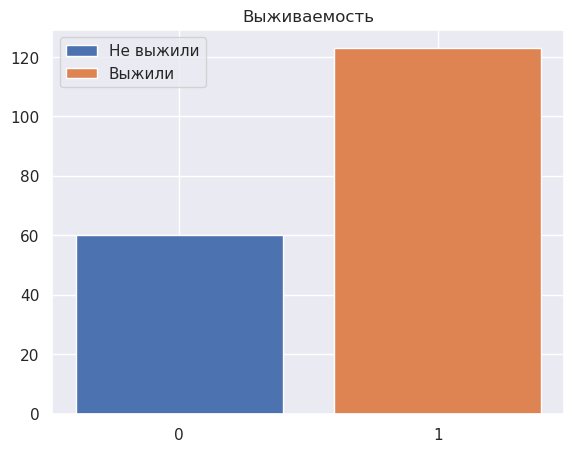

In [17]:
#Survived
ax = plt.axes([0.5, 0.5, 0.8, 0.8])  
ax.bar('0',data[data.Survived==0].Survived.count())
ax.bar('1',data[data.Survived==1].Survived.count())
ax.legend(['Не выжили','Выжили'])
ax.set_title('Выживаемость')

Text(0.5, 1.0, 'Выживаемость')

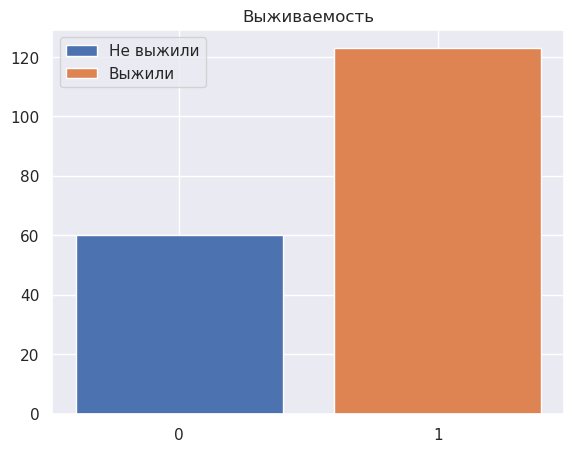

In [18]:
#Pclass
ax = plt.axes([0.5, 0.5, 0.8, 0.8])  
ax.bar('0',data[data.Survived==0].Survived.count())
ax.bar('1',data[data.Survived==1].Survived.count())
ax.legend(['Не выжили','Выжили'])
ax.set_title('Выживаемость')

<Axes: >

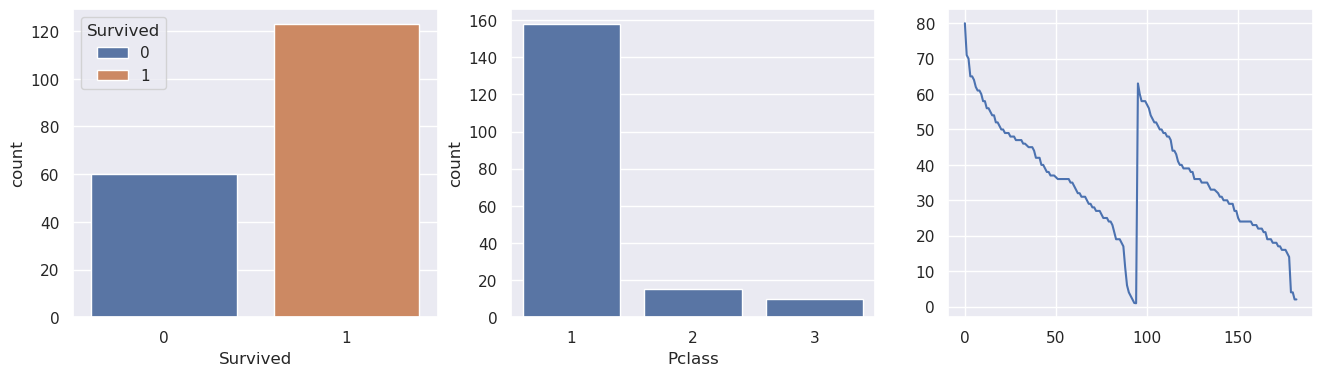

In [41]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

sns.countplot(x="Survived",hue='Survived', data=data, ax=axes[0])
sns.countplot(x="Pclass", data=data, ax=axes[1])
data.Age.plot()

In [23]:
data.Survived.count()

np.int64(183)

In [37]:
data[data.Survived==0].Survived.count()

np.int64(60)

NameError: name 'rect' is not defined

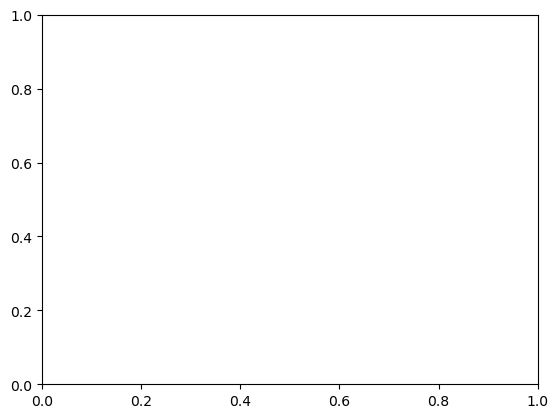

In [49]:
plt.axes()
plt.axes(rect, projection=None, polar=False, **kwargs)
plt.axes(ax)